<a href="https://colab.research.google.com/github/krishpatel1077/CS4342-krish/blob/master/CS4342_Assignment4ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CS 4342 Assignment 4 Applied Questions
##Question 1a


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Default dataset
data = pd.read_csv('Default.csv')  # Replace 'path_to_your_dataset.csv' with the actual path

# Assuming 'default' is the target variable, and 'income' and 'balance' are predictors
X = data[['income', 'balance']]
y = data['default']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on the validation set
y_pred = logreg.predict(X_val)

# Calculate the accuracy (you can use other metrics as needed)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation set accuracy: {accuracy}")


Validation set accuracy: 0.9655


##Question 2b

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Default dataset
data = pd.read_csv('Default.csv')

# Assuming 'default' is the target variable, and 'income' and 'balance' are predictors
X = data[['income', 'balance']]
y = data['default']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict probabilities of default for the validation set
y_pred_proba = logreg.predict_proba(X_val)[:, 1]  # Probability of class 1 (default)

# Classify individuals based on the probability threshold of 0.5
y_pred_class = ['Yes' if prob > 0.5 else 'No' for prob in y_pred_proba]

# Calculate the validation set error
validation_error = 1 - accuracy_score(y_val, y_pred_class)
print(f"Validation set error: {validation_error}")


Validation set error: 0.034499999999999975


##Question 1c

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Default dataset
data = pd.read_csv('Default.csv')

# Assuming 'default' is the target variable, and 'income' and 'balance' are predictors
X = data[['income', 'balance']]
y = data['default']

# Perform the process three times
for i in range(3):
    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=i * 10)

    # Fit the logistic regression model on the training set
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)

    # Predict probabilities of default for the validation set
    y_pred_proba = logreg.predict_proba(X_val)[:, 1]  # Probability of class 1 (default)

    # Classify individuals based on the probability threshold of 0.5
    y_pred_class = ['Yes' if prob > 0.5 else 'No' for prob in y_pred_proba]

    # Calculate the validation set error
    validation_error = 1 - accuracy_score(y_val, y_pred_class)
    print(f"Validation set error {i + 1}: {validation_error}")


Validation set error 1: 0.03700000000000003
Validation set error 2: 0.026000000000000023
Validation set error 3: 0.03249999999999997


The second test (random state = 20) has the least error of the bunch, around 0.026, whereas the first test (random state = 10) has the most error at 0.037. All of the sets have an error < 0.05, rendering each test statistically significant.

##Question 1d

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Default dataset
data = pd.read_csv('Default.csv')

# Convert 'student' column to a dummy variable
data['student_dummy'] = pd.get_dummies(data['student'], drop_first=True)

# Assuming 'default' is the target variable, and 'income', 'balance', and 'student_dummy' are predictors
X = data[['income', 'balance', 'student_dummy']]
y = data['default']

# Perform the validation set approach with the updated predictors
for i in range(3):
    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=i * 10)

    # Fit the logistic regression model on the training set
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)

    # Predict probabilities of default for the validation set
    y_pred_proba = logreg.predict_proba(X_val)[:, 1]  # Probability of class 1 (default)

    # Classify individuals based on the probability threshold of 0.5
    y_pred_class = ['Yes' if prob > 0.5 else 'No' for prob in y_pred_proba]

    # Calculate the validation set error
    validation_error = 1 - accuracy_score(y_val, y_pred_class)
    print(f"Validation set error {i + 1}: {validation_error}")


Validation set error 1: 0.03500000000000003
Validation set error 2: 0.03500000000000003
Validation set error 3: 0.02949999999999997


The lower validation error on the 3rd run suggests that including the test dummy variable does increase the model's accuracy.

##Question 2a

In [7]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

# Generate x: 100 random samples from a normal distribution with mean 0 and variance 1
x = np.random.normal(0, 1, 100)

# Generate noise: samples from a normal distribution with mean 0 and variance 1
noise = np.random.normal(0, 1, 100)

# Generate y using the specified equation y = x - 2x^2 + noise
y = x - 2 * x**2 + noise

# Create a DataFrame with x and y
simulated_data = pd.DataFrame({'x': x, 'y': y})

# Display the first few rows of the simulated dataset
print(simulated_data.head())

# Check the shape of the dataset
print(f"Shape of the dataset: {simulated_data.shape}")


          x         y
0  0.496714 -1.412106
1 -0.138264 -0.597144
2  0.647689 -0.534027
3  1.523030 -3.918487
4 -0.234153 -0.505095
Shape of the dataset: (100, 2)


n = 100 samples, p = predictor x

##Question 2b

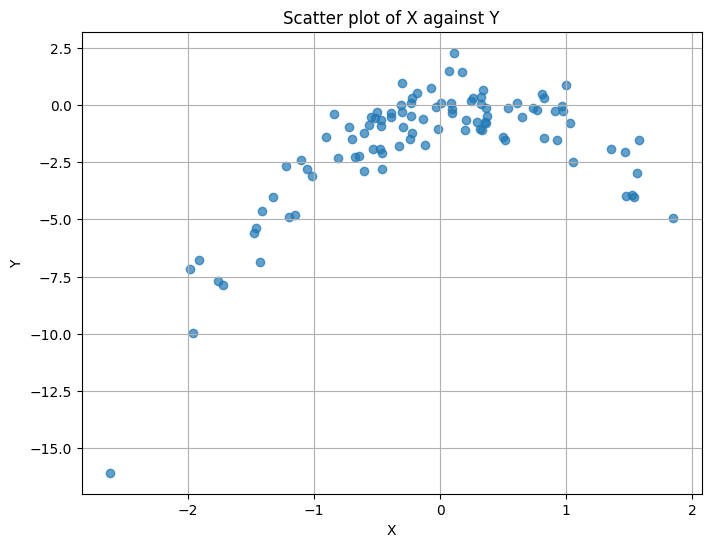

In [8]:
import matplotlib.pyplot as plt

# Scatter plot of X against Y
plt.figure(figsize=(8, 6))
plt.scatter(simulated_data['x'], simulated_data['y'], alpha=0.7)
plt.title('Scatter plot of X against Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


The data can be estimated into a parabolic relationship, with a maximum value of 2.5, and a registered minimum of -15.

##Question 2c

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
import numpy as np

# Extract predictor 'x' and target 'y' from the simulated dataset
x = simulated_data['x'].values.reshape(-1, 1)  # Reshape to make it a column vector
y = simulated_data['y'].values

# Models with increasing polynomial degrees
models = [1, 2, 3, 4]
loocv_errors = []

for degree in models:
    loocv = LeaveOneOut()
    errors = []

    for train_index, test_index in loocv.split(x):
        # Split the data into train and test sets for LOOCV
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit a polynomial regression model of given degree
        poly_features = np.polynomial.polynomial.Polynomial.fit(x_train.flatten(), y_train, degree)

        # Predict on the left-out observation
        y_pred = poly_features(x_test.flatten())

        # Compute the error for the left-out observation
        error = mean_squared_error(y_test, y_pred)
        errors.append(error)

    # Calculate average LOOCV error for the current model
    avg_error = np.mean(errors)
    loocv_errors.append(avg_error)

# Print the LOOCV errors for each model
for i, error in enumerate(loocv_errors, 1):
    print(f"Model {i}: LOOCV Error = {error}")


Model 1: LOOCV Error = 5.302956627689595
Model 2: LOOCV Error = 0.9127641950599258
Model 3: LOOCV Error = 0.9569572977749513
Model 4: LOOCV Error = 0.9727724672791455


##Question 2d

The second model had the highest LOOCV Error of 0.912. It was around expected because the data looked to follow a polynomial fit

##Question 2e

Despite increasing model complexity (from Model 2 to Model 4), the LOOCV errors don't consistently decrease. This could imply that while higher-degree polynomial models initially capture more complexity in the data, they might also start to overfit, leading to higher errors in predicting new data points.

##Question 4a

In [10]:
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Generate predictor X from a normal distribution with mean 0 and variance 1
X = np.random.normal(0, 1, 100)

# Generate noise vector 𝜖 from a normal distribution with mean 0 and variance 1
epsilon = np.random.normal(0, 1, 100)

##Question 4b

In [11]:
# Constants for the model
beta_0 = 2.5
beta_1 = 1.3
beta_2 = -1.8
beta_3 = 0.9

# Generate the response vector Y based on the model equation
Y = beta_0 + beta_1 * X + beta_2 * X**2 + beta_3 * X**3 + epsilon


##Question 4c

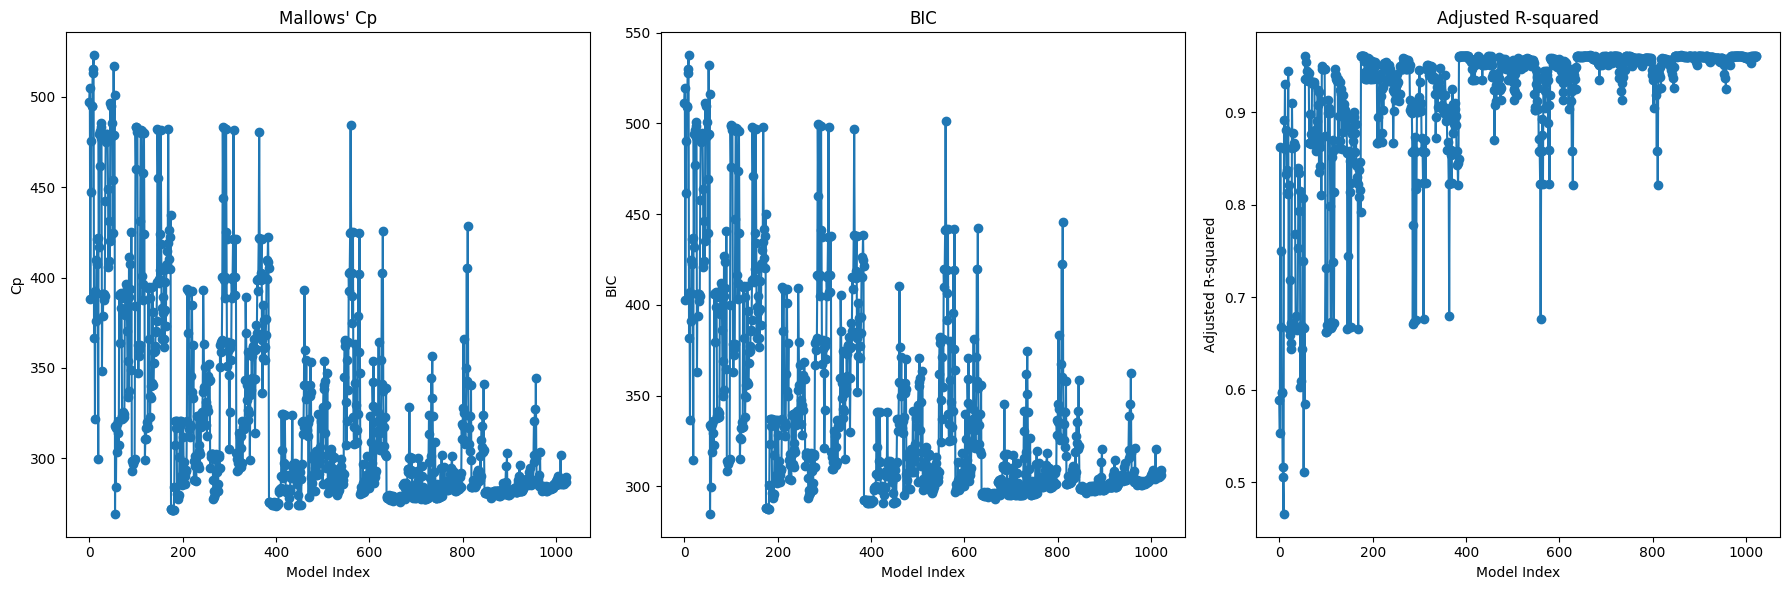

Best model based on Mallows' Cp:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     798.0
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           1.05e-67
Time:                        16:13:03   Log-Likelihood:                -133.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      96   BIC:                             284.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.34

In [12]:
import itertools
import statsmodels.api as sm

# Generate predictors X^2 to X^10
X_powers = [X ** i for i in range(1, 11)]

# Combine predictors X, X^2, ..., X^10 into a DataFrame
X_all = np.column_stack(X_powers)

# Create a list of model combinations (subset selection)
models = []
for k in range(1, 11):  # Try models with 1 to 10 predictors
    subsets = itertools.combinations(X_all.T, k)
    for subset in subsets:
        X_subset = np.column_stack(subset)
        X_subset = sm.add_constant(X_subset)  # Add constant for intercept
        model = sm.OLS(Y, X_subset).fit()
        models.append(model)

# Calculate Cp, BIC, and adjusted R-squared for each model
Cp_values = [model.aic + 2 * model.df_model - len(X_powers) * (100 / (100 - len(X_powers) - 1)) for model in models]
BIC_values = [model.bic for model in models]
adjusted_R2_values = [model.rsquared_adj for model in models]

# Find the indices of the models with minimum Cp, BIC, and maximum adjusted R-squared
best_Cp_index = Cp_values.index(min(Cp_values))
best_BIC_index = BIC_values.index(min(BIC_values))
best_adj_R2_index = adjusted_R2_values.index(max(adjusted_R2_values))

# Get the best models based on indices
best_Cp_model = models[best_Cp_index]
best_BIC_model = models[best_BIC_index]
best_adj_R2_model = models[best_adj_R2_index]

# Plotting Cp, BIC, and adjusted R-squared values
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].plot(Cp_values, marker='o')
axs[0].set_title('Mallows\' Cp')
axs[0].set_xlabel('Model Index')
axs[0].set_ylabel('Cp')

axs[1].plot(BIC_values, marker='o')
axs[1].set_title('BIC')
axs[1].set_xlabel('Model Index')
axs[1].set_ylabel('BIC')

axs[2].plot(adjusted_R2_values, marker='o')
axs[2].set_title('Adjusted R-squared')
axs[2].set_xlabel('Model Index')
axs[2].set_ylabel('Adjusted R-squared')

plt.tight_layout()
plt.show()

# Report coefficients of the best models
print("Best model based on Mallows' Cp:")
print(best_Cp_model.summary())
print("\nBest model based on BIC:")
print(best_BIC_model.summary())
print("\nBest model based on Adjusted R-squared:")
print(best_adj_R2_model.summary())


##Question 4d - Backwards Selection

In [13]:
# Backward stepwise selection
def backward_selection(X, y):
    remaining_predictors = set(range(X.shape[1]))
    selected_predictors = list(remaining_predictors)
    current_score = best_new_score = 0.0

    while remaining_predictors and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining_predictors:
            predictors = list(remaining_predictors - {candidate})
            X_subset = sm.add_constant(X[:, predictors])
            model = sm.OLS(y, X_subset).fit()
            score = model.rsquared_adj
            scores_with_candidates.append((score, candidate))

        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()

        if current_score < best_new_score:
            remaining_predictors.remove(best_candidate)
            selected_predictors = list(remaining_predictors)
            current_score = best_new_score

    return selected_predictors

# Perform backward stepwise selection
selected_backward = backward_selection(X_all, Y)
print("Selected predictors (backward stepwise):", selected_backward)


Selected predictors (backward stepwise): [0, 1, 2, 3, 5, 7, 9]


##Quetsion 4d - Forward Selection

In [14]:
# Forward stepwise selection
def forward_selection(X, y):
    remaining_predictors = set(range(X.shape[1]))
    selected_predictors = []
    current_score = best_new_score = 0.0

    while remaining_predictors and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining_predictors:
            predictors = selected_predictors + [candidate]
            X_subset = sm.add_constant(X[:, predictors])
            model = sm.OLS(y, X_subset).fit()
            score = model.rsquared_adj
            scores_with_candidates.append((score, candidate))

        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()

        if current_score < best_new_score:
            remaining_predictors.remove(best_candidate)
            selected_predictors.append(best_candidate)
            current_score = best_new_score

    return selected_predictors

# Perform forward stepwise selection
selected_forward = forward_selection(X_all, Y)
print("Selected predictors (forward stepwise):", selected_forward)


Selected predictors (forward stepwise): [2, 1, 0, 9, 4]


##Question 4e

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.20355938619627523, tolerance: 0.18576236506286775
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.270250346819239, tolerance: 0.18576236506286775
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.32331381870039877, tolerance: 0.18576236506286775
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: Conv

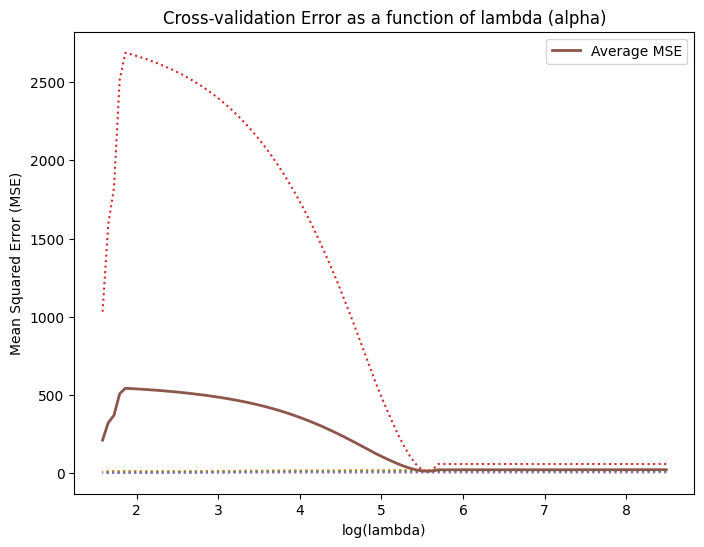

Optimal alpha (lambda): 259.8415385826945

Resulting coefficient estimates:
beta_0: 0.0
beta_1: -0.0
beta_2: 0.0
beta_3: -0.0
beta_4: 0.0
beta_5: -0.0
beta_6: 0.0
beta_7: -0.0
beta_8: 0.0
beta_9: -0.0019991104119515433


In [16]:
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

# Generate predictors X^2 to X^10
X_powers = [X ** i for i in range(1, 11)]

# Combine predictors X, X^2, ..., X^10 into a single array
X_all = np.column_stack(X_powers)

# Fit Lasso regression model with cross-validation
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_all, Y)

# Plot cross-validation errors as a function of lambda (alpha)
plt.figure(figsize=(8, 6))
plt.plot(np.log(lasso.alphas_), lasso.mse_path_, ':')
plt.plot(np.log(lasso.alphas_), lasso.mse_path_.mean(axis=1), label='Average MSE', linewidth=2)
plt.xlabel('log(lambda)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Cross-validation Error as a function of lambda (alpha)')
plt.legend()
plt.show()

# Report the optimal alpha (lambda) and resulting coefficient estimates
print(f"Optimal alpha (lambda): {lasso.alpha_}")
lasso_coefs = dict(zip(['beta_0'] + [f'beta_{i}' for i in range(1, 11)], lasso.coef_))
print("\nResulting coefficient estimates:")
for key, value in lasso_coefs.items():
    print(f"{key}: {value}")


##Question 4f - Best subset selection

In [18]:
# Set seed for reproducibility
np.random.seed(42)

# Generate predictor X of length n = 100 from a normal distribution with mean 0 and variance 1
X = np.random.normal(0, 1, 100)

# Generate response vector Y according to the updated model equation Y = beta_0 + beta_7*X^7 + epsilon
beta_0_updated = 3.0  # Define beta_0 for the updated model
X_updated = X**7  # Predictor X^7
epsilon_updated = np.random.normal(0, 1, 100)  # Noise vector

# Generate the response vector Y based on the updated model equation
Y_updated = beta_0_updated + 0.5 * X_updated + epsilon_updated  # Using 0.5 as a coefficient for X^7
# Perform best subset selection for predictors X^7 for the updated model
models_updated = []
X_subset_updated = X_updated.reshape(-1, 1)
X_subset_updated = sm.add_constant(X_subset_updated)
model_updated = sm.OLS(Y_updated, X_subset_updated).fit()
models_updated.append(model_updated)

# Report the best model obtained for the updated equation
print("Best model based on the updated equation (Y = beta_0 + beta_7*X^7 + epsilon):")
print(models_updated[0].summary())


Best model based on the updated equation (Y = beta_0 + beta_7*X^7 + epsilon):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.060e+05
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.22e-164
Time:                        16:34:02   Log-Likelihood:                -136.25
No. Observations:                 100   AIC:                             276.5
Df Residuals:                      98   BIC:                             281.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

##Question 4f - Lasso

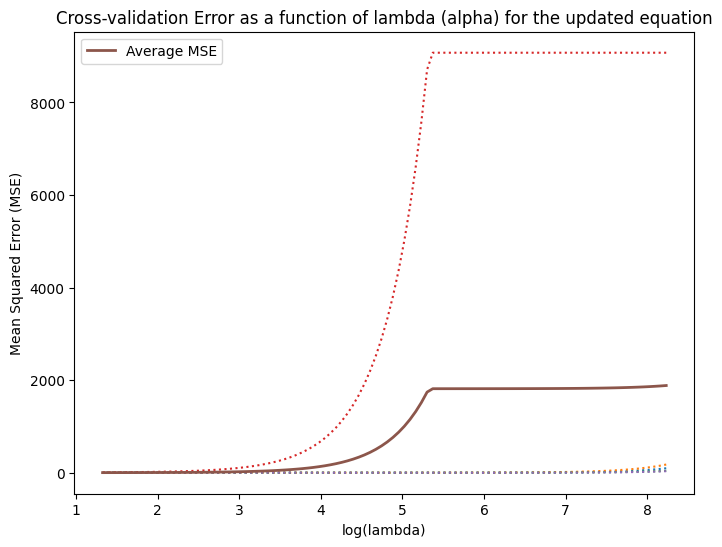

Optimal alpha (lambda) for the updated equation: 3.7626652229030206
Resulting coefficient estimate for X^7: 0.4985338740744377


In [19]:
# Set seed for reproducibility
np.random.seed(42)

# Generate predictor X of length n = 100 from a normal distribution with mean 0 and variance 1
X = np.random.normal(0, 1, 100)

# Generate response vector Y according to the updated model equation Y = beta_0 + beta_7*X^7 + epsilon
beta_0_updated = 3.0  # Define beta_0 for the updated model
X_updated = X**7  # Predictor X^7
epsilon_updated = np.random.normal(0, 1, 100)  # Noise vector

# Generate the response vector Y based on the updated model equation
Y_updated = beta_0_updated + 0.5 * X_updated + epsilon_updated  # Using 0.5 as a coefficient for X^7
# Fit Lasso regression model with cross-validation for the updated equation
lasso_updated = LassoCV(cv=5, random_state=42)
lasso_updated.fit(X_updated.reshape(-1, 1), Y_updated)

# Plot cross-validation errors as a function of lambda (alpha) for the updated equation
plt.figure(figsize=(8, 6))
plt.plot(np.log(lasso_updated.alphas_), lasso_updated.mse_path_, ':')
plt.plot(np.log(lasso_updated.alphas_), lasso_updated.mse_path_.mean(axis=1), label='Average MSE', linewidth=2)
plt.xlabel('log(lambda)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Cross-validation Error as a function of lambda (alpha) for the updated equation')
plt.legend()
plt.show()

# Report the optimal alpha (lambda) and resulting coefficient estimate for the updated equation
print(f"Optimal alpha (lambda) for the updated equation: {lasso_updated.alpha_}")
print(f"Resulting coefficient estimate for X^7: {lasso_updated.coef_[0]}")
